In [2]:
import numpy as np

np.save

<function numpy.save(file, arr, allow_pickle=True, fix_imports=True)>

In [1]:
import array_to_latex
from IPython.display import display
import matplotlib.pyplot as plt
import numpy
import pandas
from scipy.stats import spearmanr
import seaborn as sns
import warnings
from tools import *

%matplotlib inline

warnings.filterwarnings('ignore')

## Distribution of P(active) values for each position

In [2]:
total_compounds = pd.read_csv('../data_preparation/output/total_compounds.csv')
display(total_compounds.head(5))

,structure,read_count,bb1,bb2,bb3,bb1_iso,bb2_iso,bb3_iso
0,CN(Cc1c(F)ccc(Cl)c1F)C(=O)CCn1ccc(C(=O)NCCC(c2...,172,NCC1=C(F)C(Cl)=CC=C1F,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(c(c(c1F)CN)F)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
1,CN(Cc1cc(-c2ccc(Cl)cc2)no1)C(=O)CCn1ccc(C(=O)N...,162,NCC1=CC(C2=CC=C(Cl)C=C2)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(ccc1c2cc(on2)CN)Cl,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
2,CC(C)c1nc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc3...,149,CC(C)C1=NC(CN)=NO1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)c1nc(no1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
3,CN(Cc1cccc(C(F)(F)F)c1)C(=O)CCn1ccc(C(=O)NCCC(...,326,NCC1=CC(C(F)(F)F)=CC=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,c1cc(cc(c1)C(F)(F)F)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2
4,CC(C)Cc1cc(CN(C)C(=O)CCn2ccc(C(=O)NCCC(c3ccccc...,329,CC(C)CC1=NOC(CN)=C1,c1cn(nc1C(=O)O)CCC(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1,CC(C)Cc1cc(on1)CN,c1cn(nc1C(=O)O)CCC(=O)O,c1ccc(cc1)C(CCN)c2ccccc2


In [3]:
bb1_list = pd.read_csv('../data_preparation/output/bb1_list.csv')
bb2_list = pd.read_csv('../data_preparation/output/bb2_list.csv')
bb3_list = pd.read_csv('../data_preparation/output/bb3_list.csv')

In [4]:
bb1_pactive = calc_pactive(total_compounds, bb1_list, 'bb1')
bb2_pactive = calc_pactive(total_compounds, bb2_list, 'bb2')
bb3_pactive = calc_pactive(total_compounds, bb3_list, 'bb3')

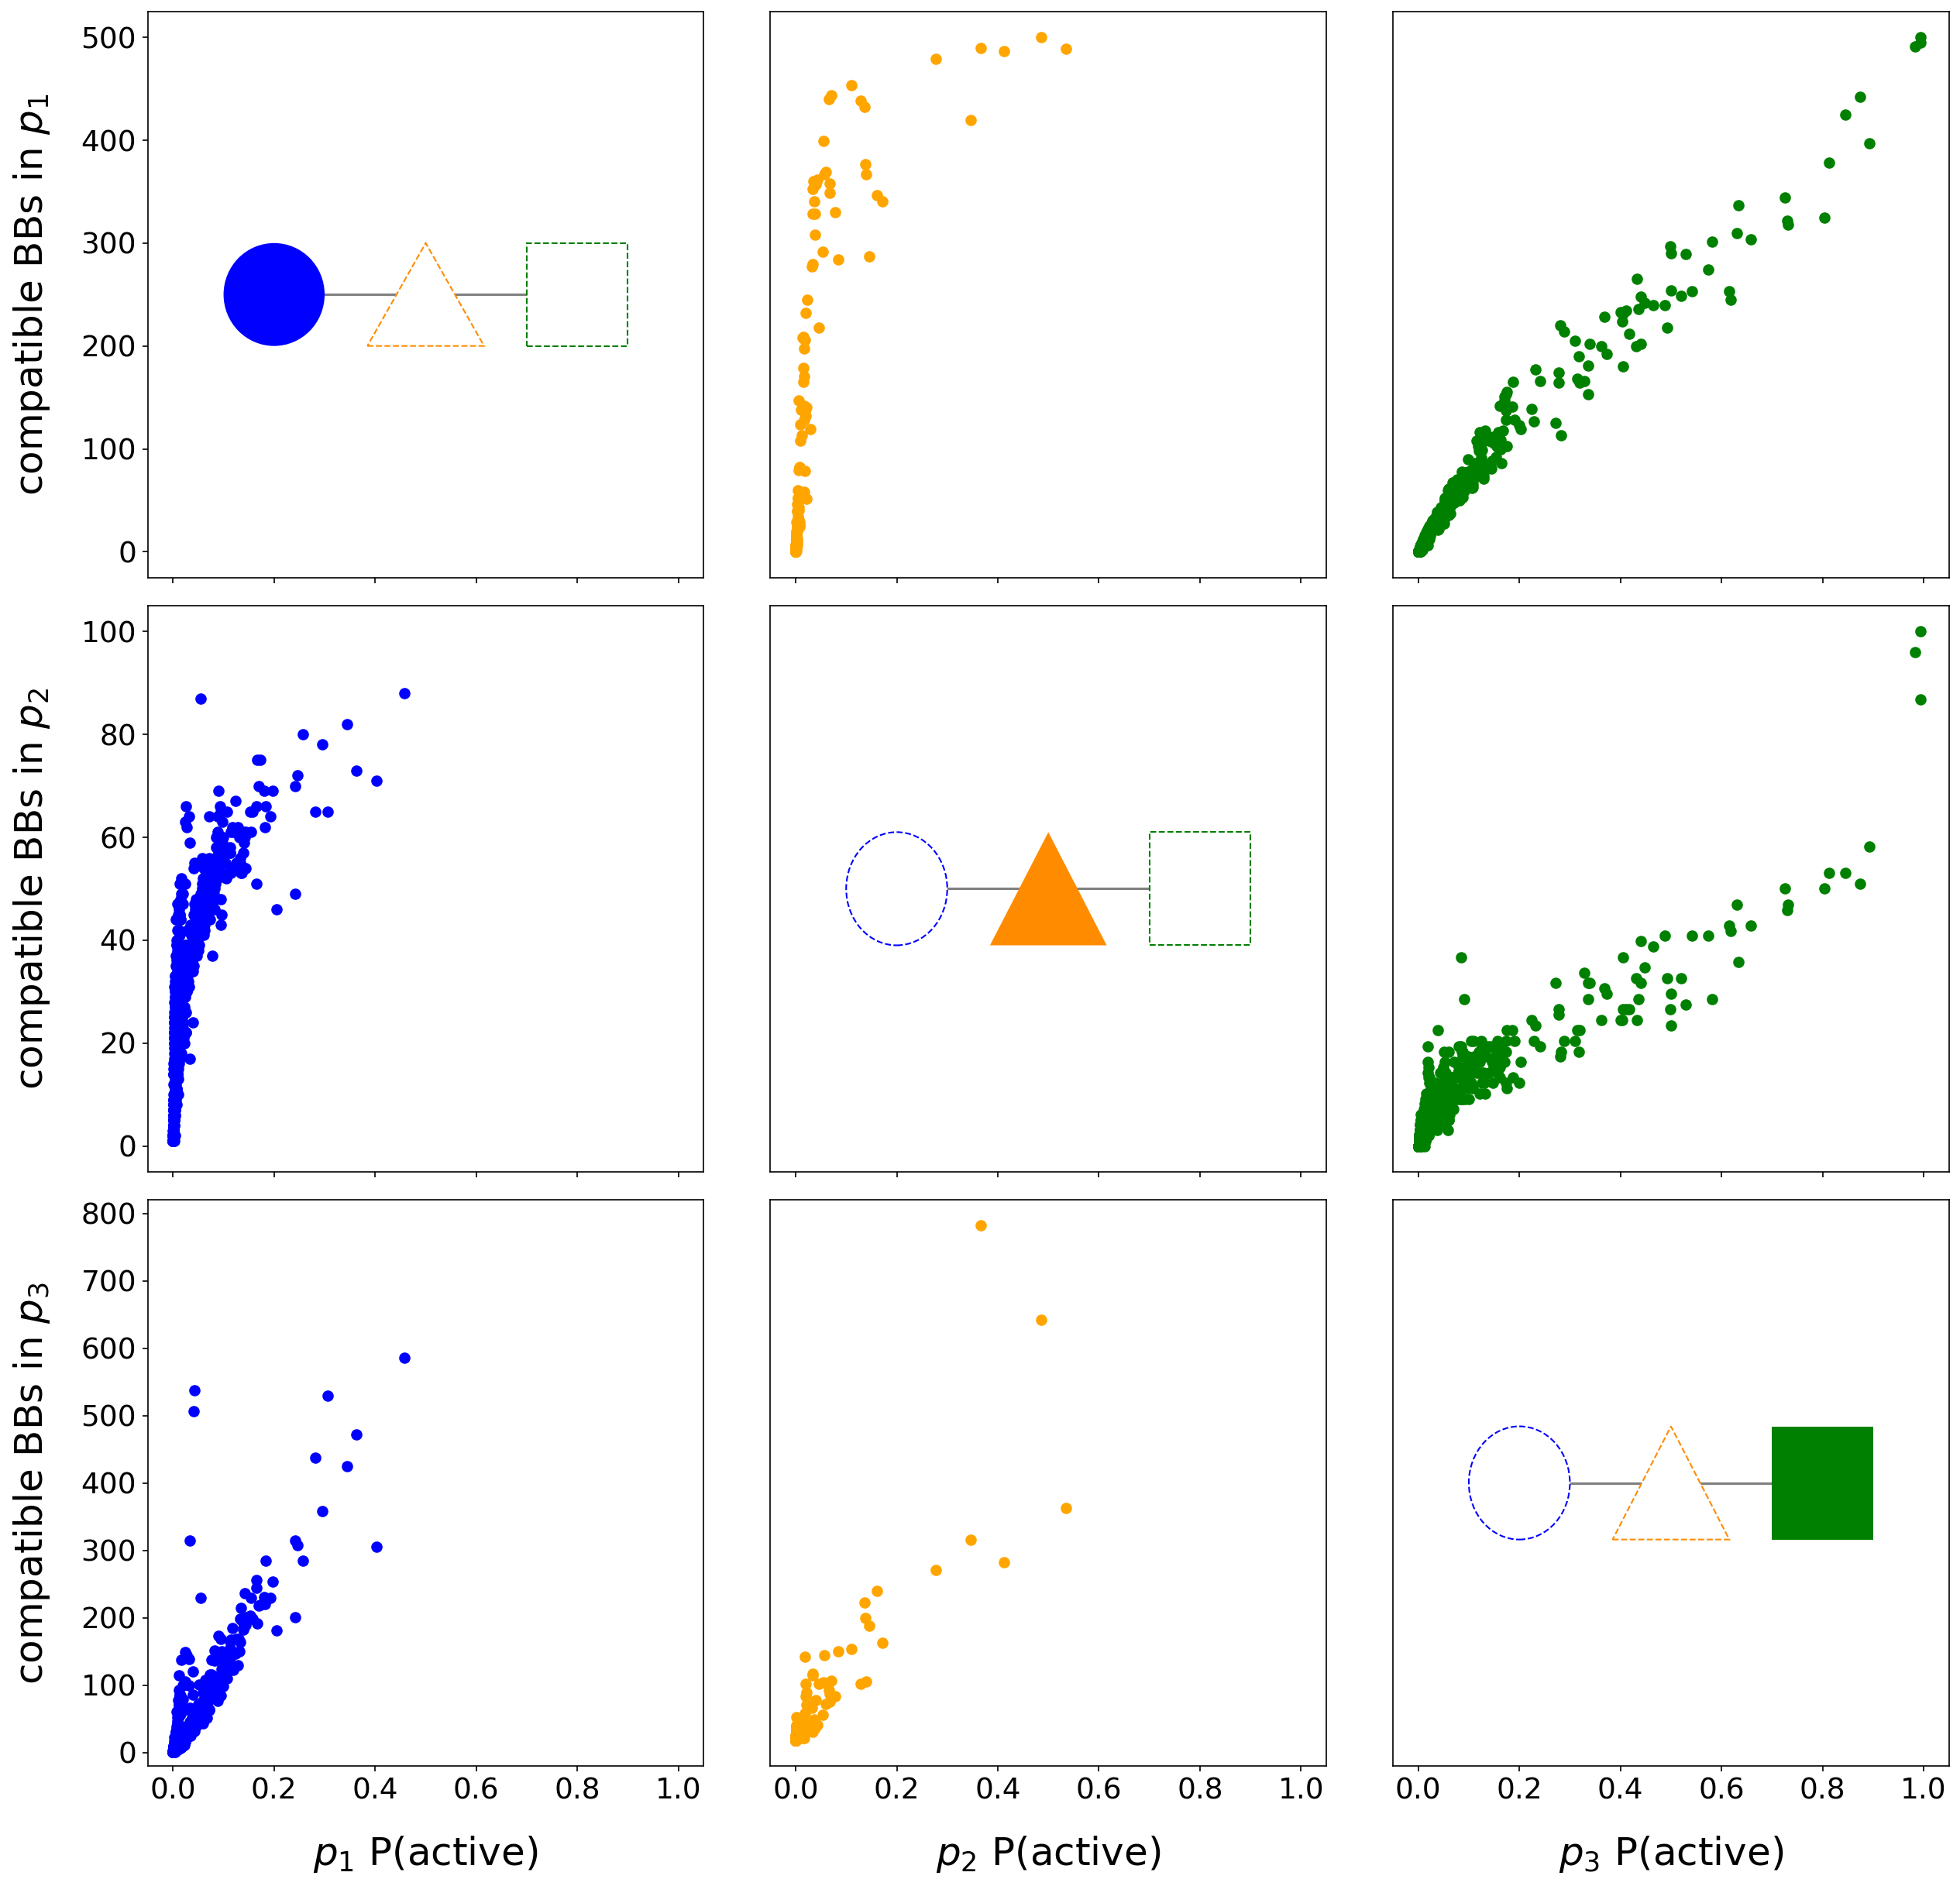

In [5]:
total_merged = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
actives = get_actives(total_merged)
D_12, D_13, D_21, D_23, D_31, D_32 = plot_compatible(actives)

In [6]:
# Correlation values going rowwise
val = np.zeros((3,3))
val[0][1] = spearmanr(D_21['P(active)_2'], D_21['bb1'])[0]
val[0][2] = spearmanr(D_31['P(active)_3'], D_31['bb1'])[0]
val[1][0] = spearmanr(D_12['P(active)_1'], D_12['bb2'])[0]
val[1][2] = spearmanr(D_32['P(active)_3'], D_32['bb2'])[0]
val[2][0] = spearmanr(D_13['P(active)_1'], D_13['bb3'])[0]
val[2][1] = spearmanr(D_23['P(active)_2'], D_23['bb3'])[0]
array_to_latex.to_ltx(val, frmt='{:.4f}', arraytype='tabular')

\begin{tabular}
  0.0000 &  0.9732 &  0.9859\\
  0.9075 &  0.0000 &  0.9380\\
  0.9053 &  0.9018 &  0.0000
\end{tabular}


### View 2D bins

In [9]:
all_bins = np.arange(0, 1.2, 0.2)
bb1_pactive = apply_bins(bb1_pactive, bb_pos='bb1', all_bins=all_bins)
bb2_pactive = apply_bins(bb2_pactive, bb_pos='bb2', all_bins=all_bins)
bb3_pactive = apply_bins(bb3_pactive, bb_pos='bb3', all_bins=all_bins)

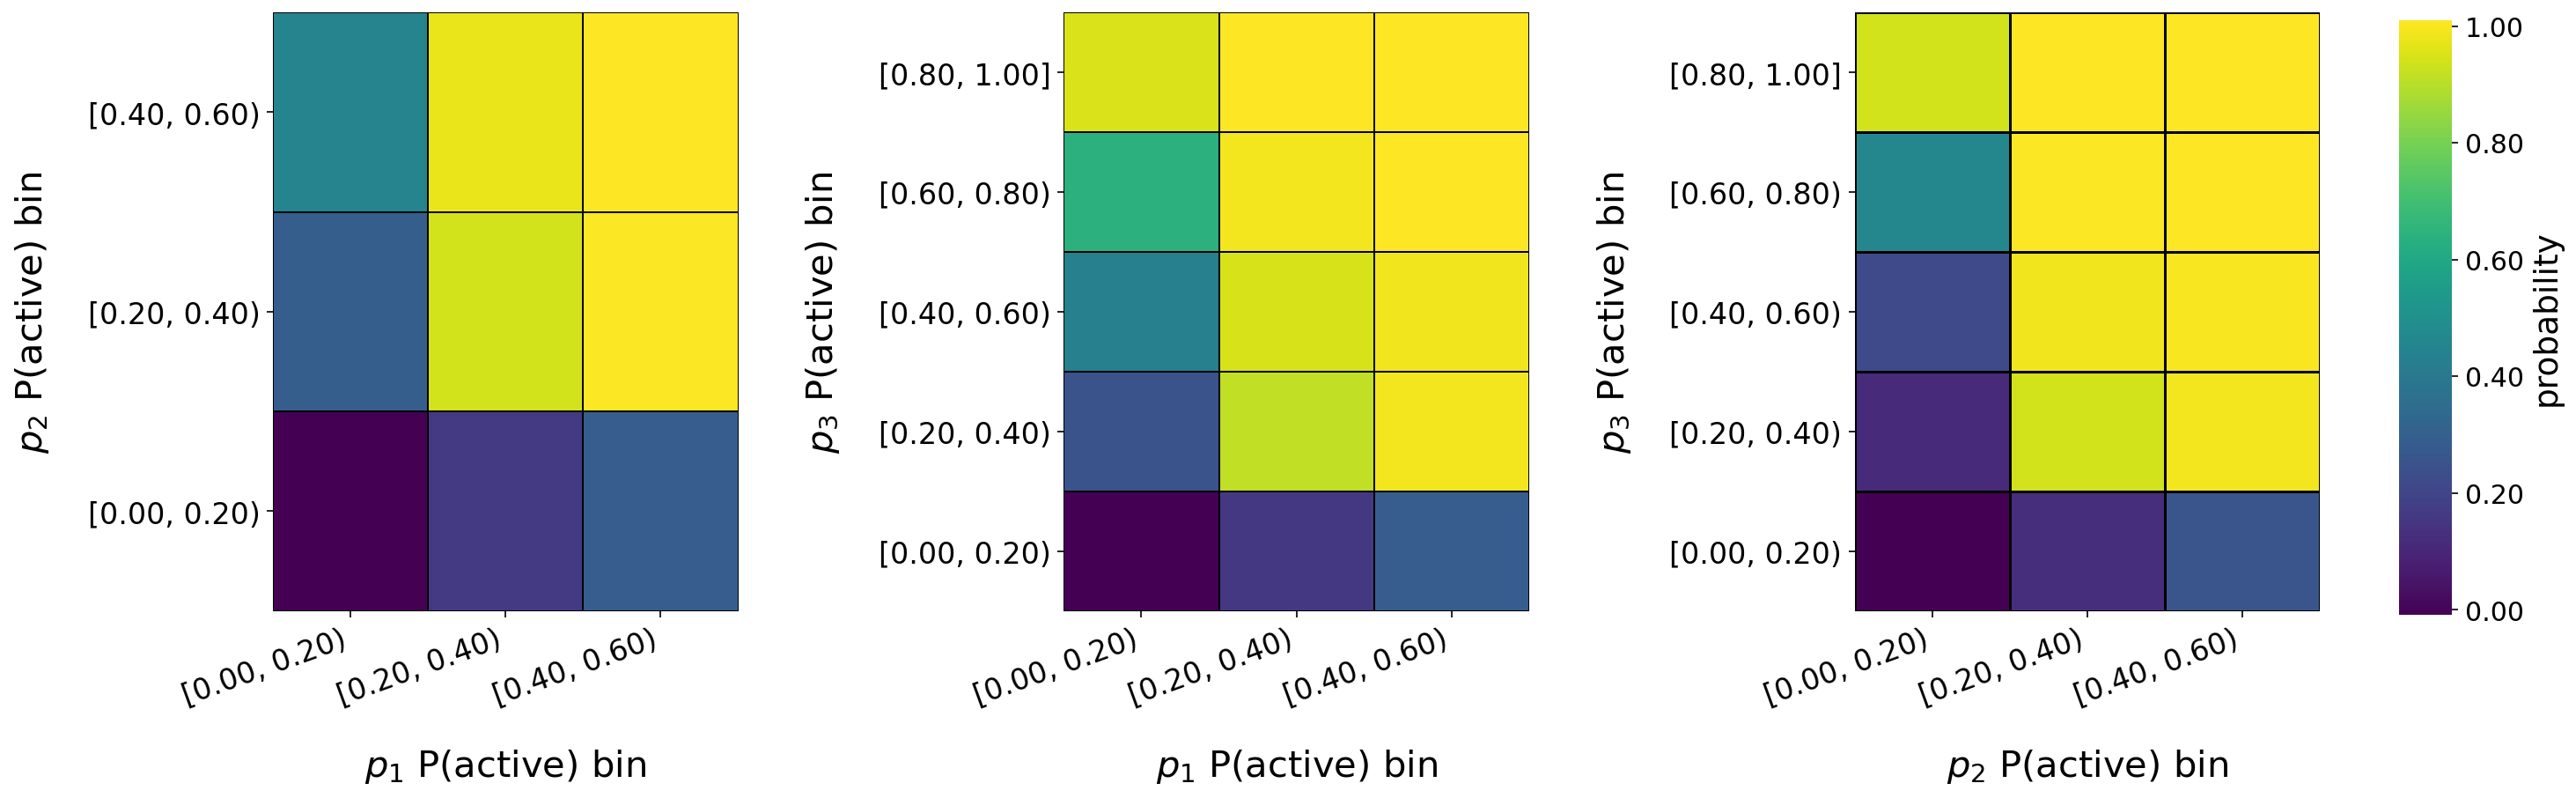

In [10]:
total_bins = merge_df(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive)
bins_1_2, bins_1_3, bins_2_3 = plot_2D_bins(total_bins, bb1_pactive, bb2_pactive, bb3_pactive, all_bins)

In [11]:
array_to_latex.to_ltx(bins_1_2, frmt='{:.4f}', arraytype='tabular')
array_to_latex.to_ltx(bins_1_3, frmt='{:.4f}', arraytype='tabular')
array_to_latex.to_ltx(bins_2_3, frmt='{:.4f}', arraytype='tabular')

\begin{tabular}
  0.4452 &  0.9451 &  0.9771\\
  0.2946 &  0.9104 &  0.9697\\
  0.0100 &  0.1706 &  0.2930
\end{tabular}
\begin{tabular}
  0.9417 &  0.9973 &  1.0000\\
  0.6412 &  0.9813 &  1.0000\\
  0.4329 &  0.9403 &  0.9768\\
  0.2579 &  0.9037 &  0.9815\\
  0.0036 &  0.1666 &  0.2922
\end{tabular}
\begin{tabular}
  0.9301 &  0.9994 &  0.9989\\
  0.4631 &  0.9953 &  0.9981\\
  0.2261 &  0.9769 &  0.9908\\
  0.1185 &  0.9301 &  0.9827\\
  0.0012 &  0.1325 &  0.2630
\end{tabular}


### Import similarity matrix

In [13]:
bb1_fps = [gen_morgan(smi) for smi in bb1_list['iso_SMILES']]
bb2_fps = [gen_morgan(smi) for smi in bb2_list['iso_SMILES']]
bb3_fps = [gen_morgan(smi) for smi in bb3_list['iso_SMILES']]

bb1_sim_2D = tanimoto_matrix(bb1_fps, bb1_fps)
bb2_sim_2D = tanimoto_matrix(bb2_fps, bb2_fps)
bb3_sim_2D = tanimoto_matrix(bb3_fps, bb3_fps)

bb1_dist_2D = dist_mat(bb1_sim_2D)
bb2_dist_2D = dist_mat(bb2_sim_2D)
bb3_dist_2D = dist_mat(bb3_sim_2D)

In [15]:
bb1_sim_3D = np.load('../similarity_calculation/output/bb1_list.npy')
bb2_sim_3D = np.load('../similarity_calculation/output/bb2_list.npy')
bb3_sim_3D = np.load('../similarity_calculation/output/bb3_list.npy')

bb1_dist_3D = dist_mat(bb1_sim_3D)
bb2_dist_3D = dist_mat(bb2_sim_3D)
bb3_dist_3D = dist_mat(bb3_sim_3D)

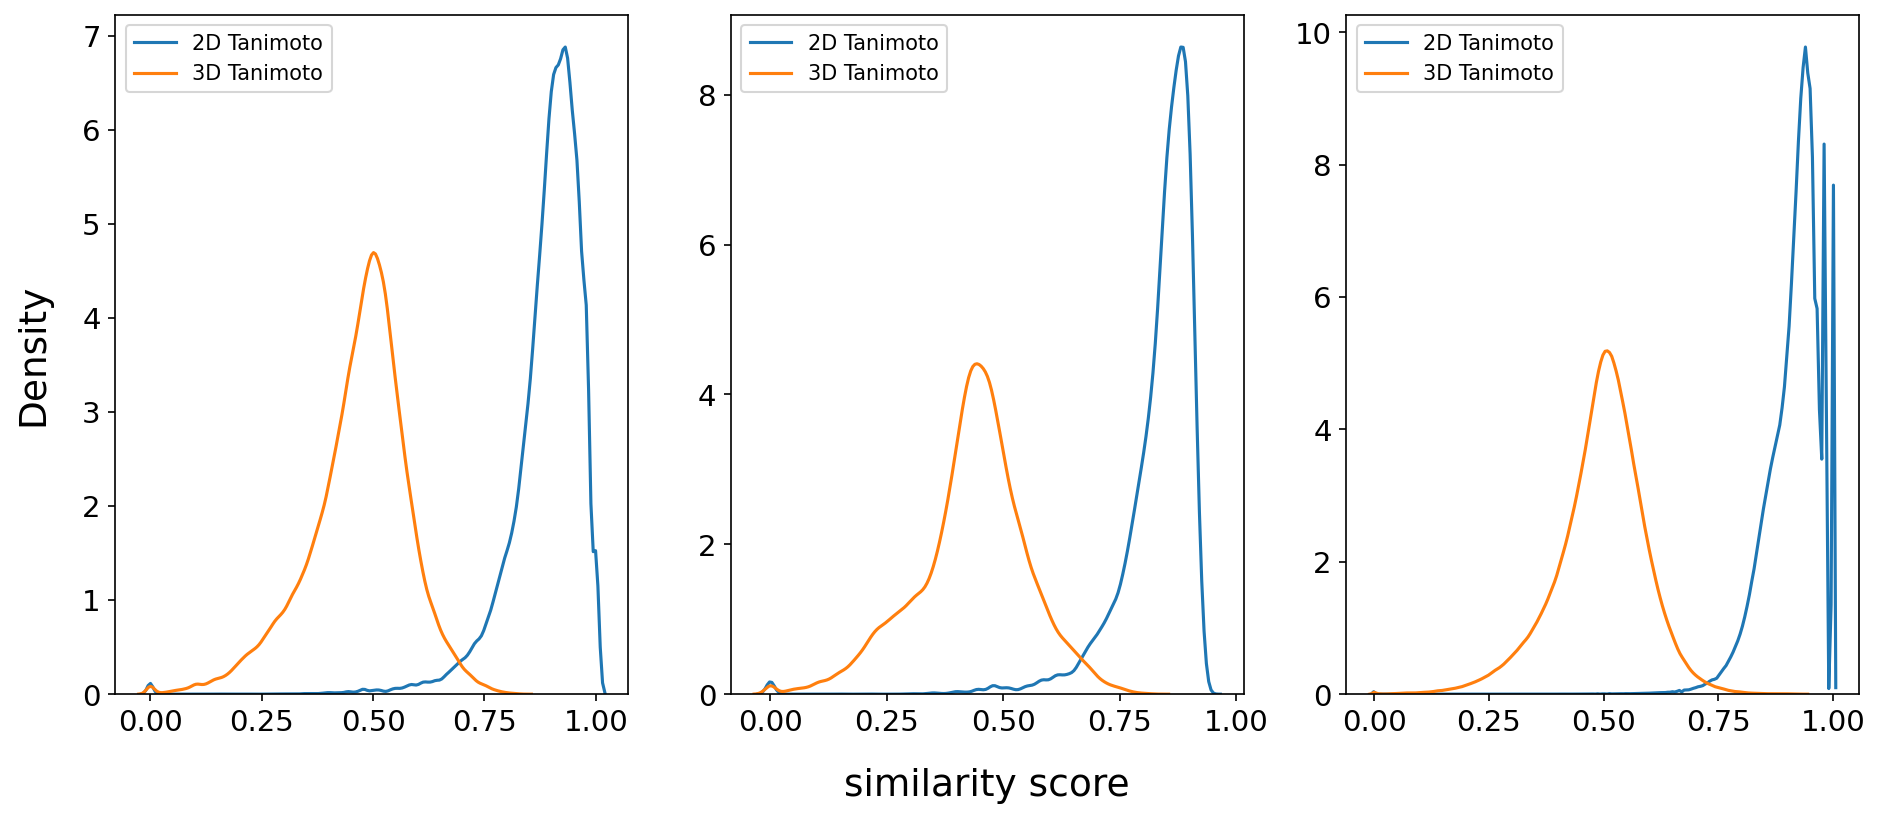

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15,6), dpi=150)
sns.kdeplot(bb1_dist_2D.ravel(), label='2D Tanimoto', ax=axs[0])
sns.kdeplot(bb1_dist_3D.ravel()/2, label='3D Tanimoto', ax=axs[0])
axs[0].legend(loc='best')
axs[0].set_xlabel('')
axs[0].set_ylabel('Density', fontsize=18, labelpad=15)
axs[0].tick_params(labelsize=14)

sns.kdeplot(bb2_dist_2D.ravel(), label='2D Tanimoto', ax=axs[1])
sns.kdeplot(bb2_dist_3D.ravel()/2, label='3D Tanimoto', ax=axs[1])
axs[1].legend(loc='best')
axs[1].set_xlabel('similarity score', fontsize=18, labelpad=15)
axs[1].set_ylabel('')
axs[1].tick_params(labelsize=14)

sns.kdeplot(bb3_dist_2D.ravel(), label='2D Tanimoto', ax=axs[2])
sns.kdeplot(bb3_dist_3D.ravel()/2, label='3D Tanimoto', ax=axs[2])
axs[2].legend(loc='best')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].tick_params(labelsize=14)

#### Map coordinates with UMAP

In [17]:
trans_bb1 = umap_transform(bb1_dist_3D)
trans_bb2 = umap_transform(bb2_dist_3D)
trans_bb3 = umap_transform(bb3_dist_3D)

,Position,top - top dist,top - rand dist
0,1,3.487797,6.007284
1,2,1.209196,4.787256
2,3,4.603769,8.225290


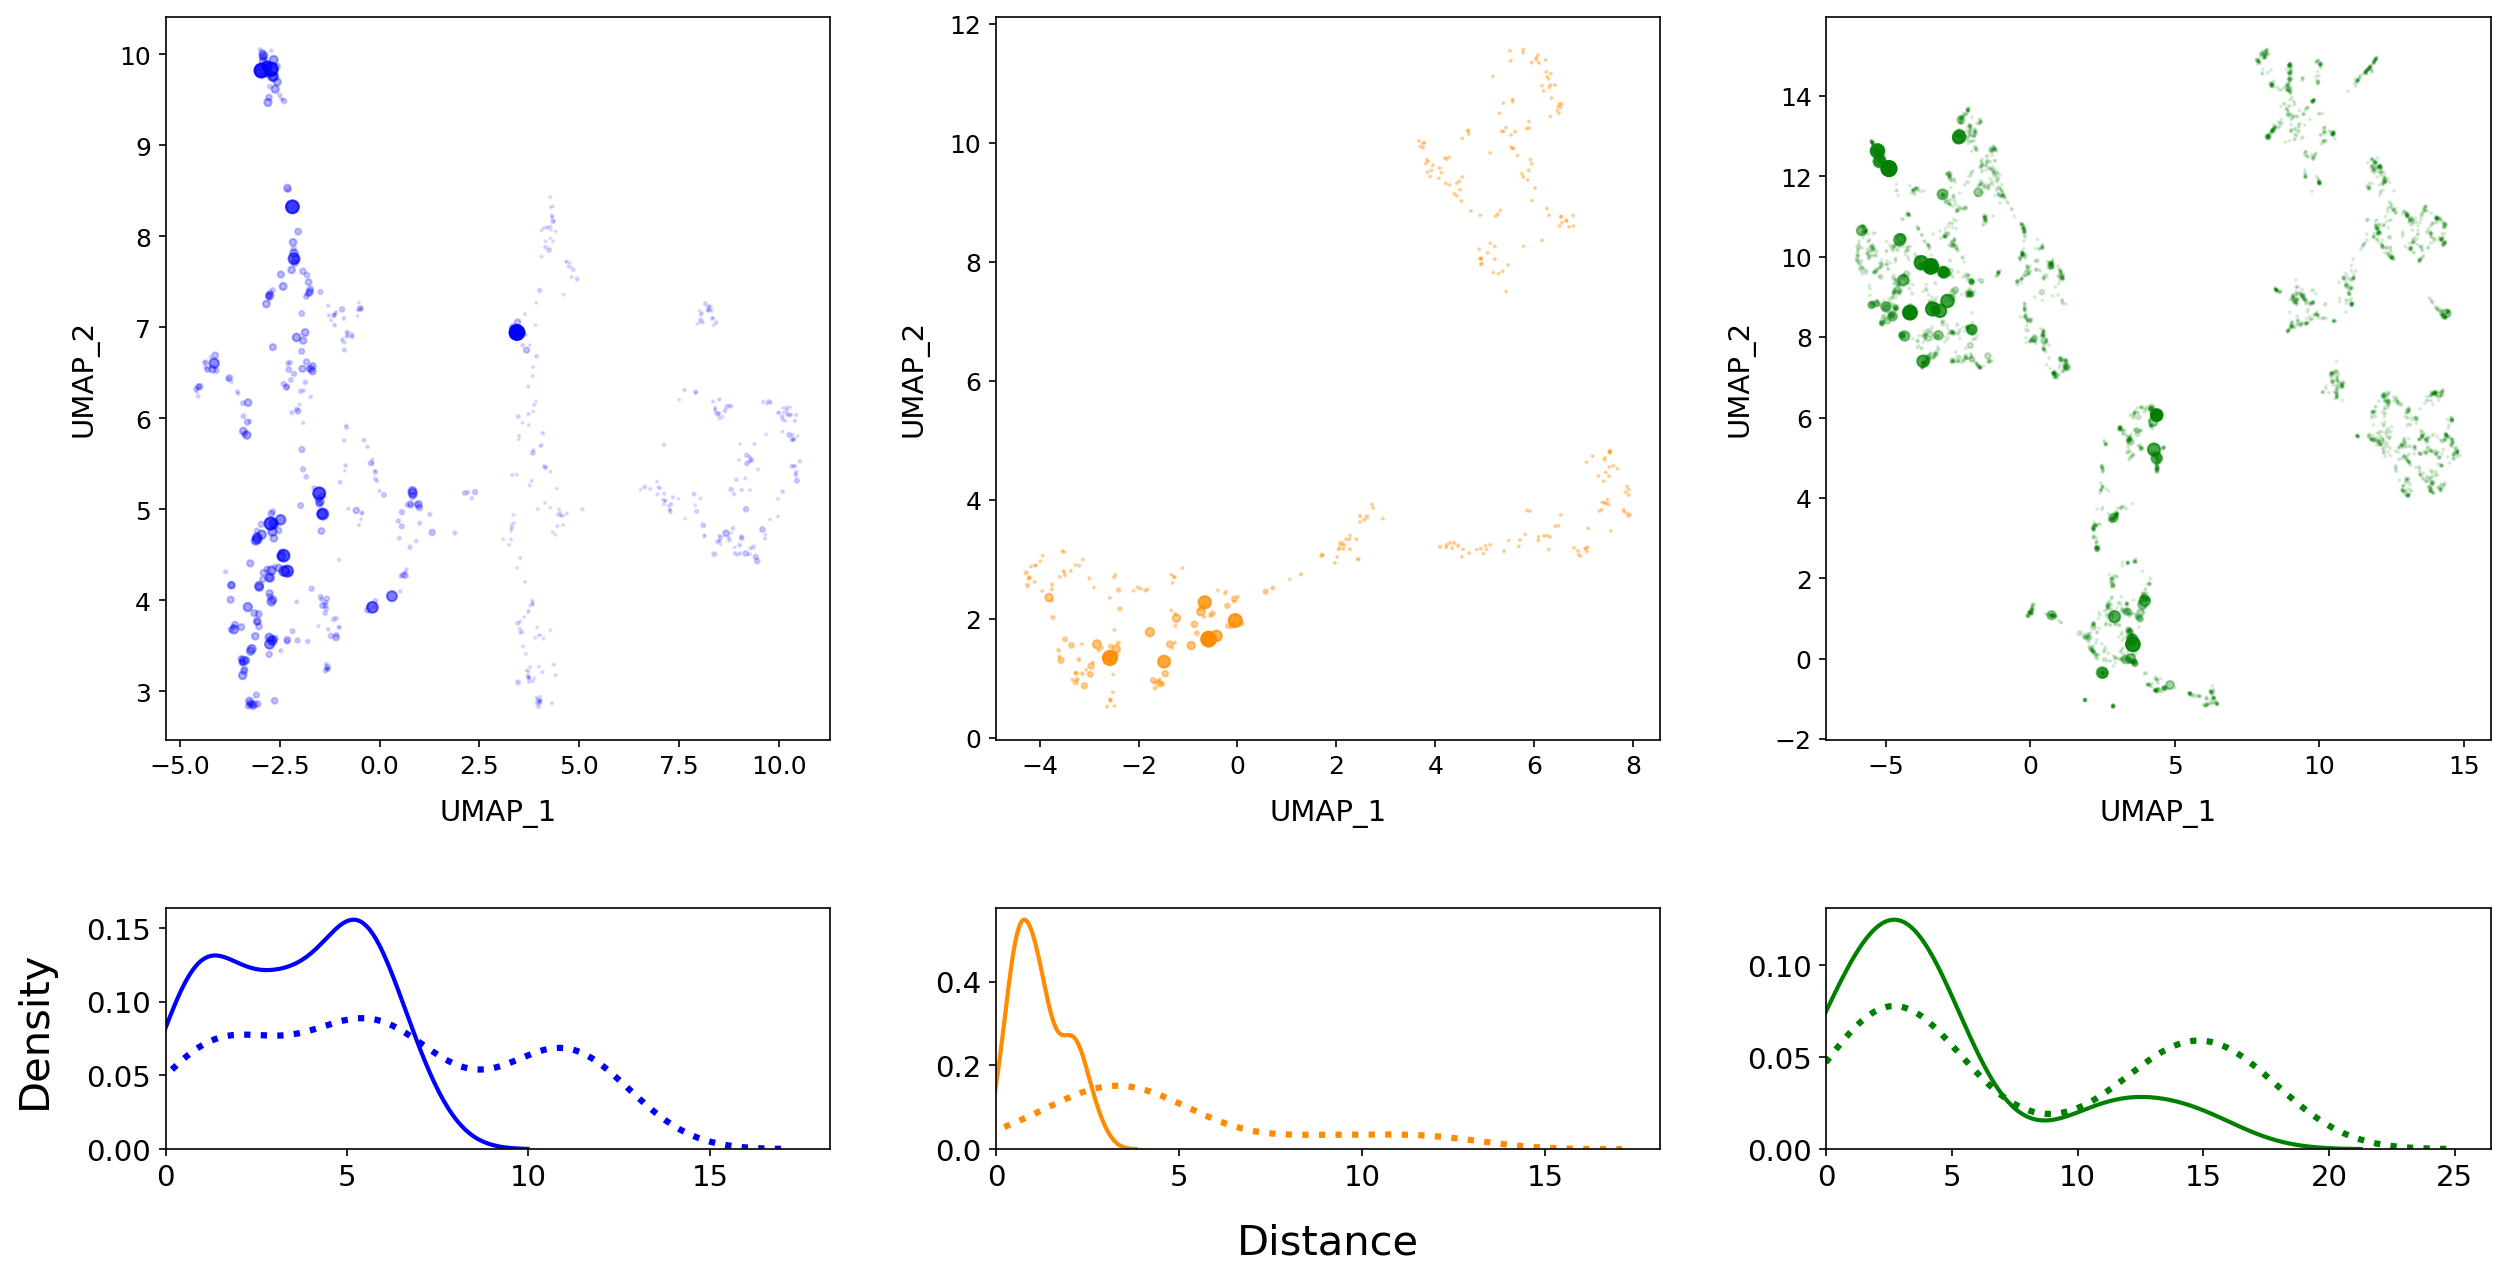

In [18]:
bb1_pactive, bb2_pactive, bb3_pactive = plot_umap(bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)


### Same but with 2D Tanimoto

,Position,top - top dist,top - rand dist
0,1,1.777165,4.086515
1,2,3.795657,4.824961
2,3,5.365798,5.100538


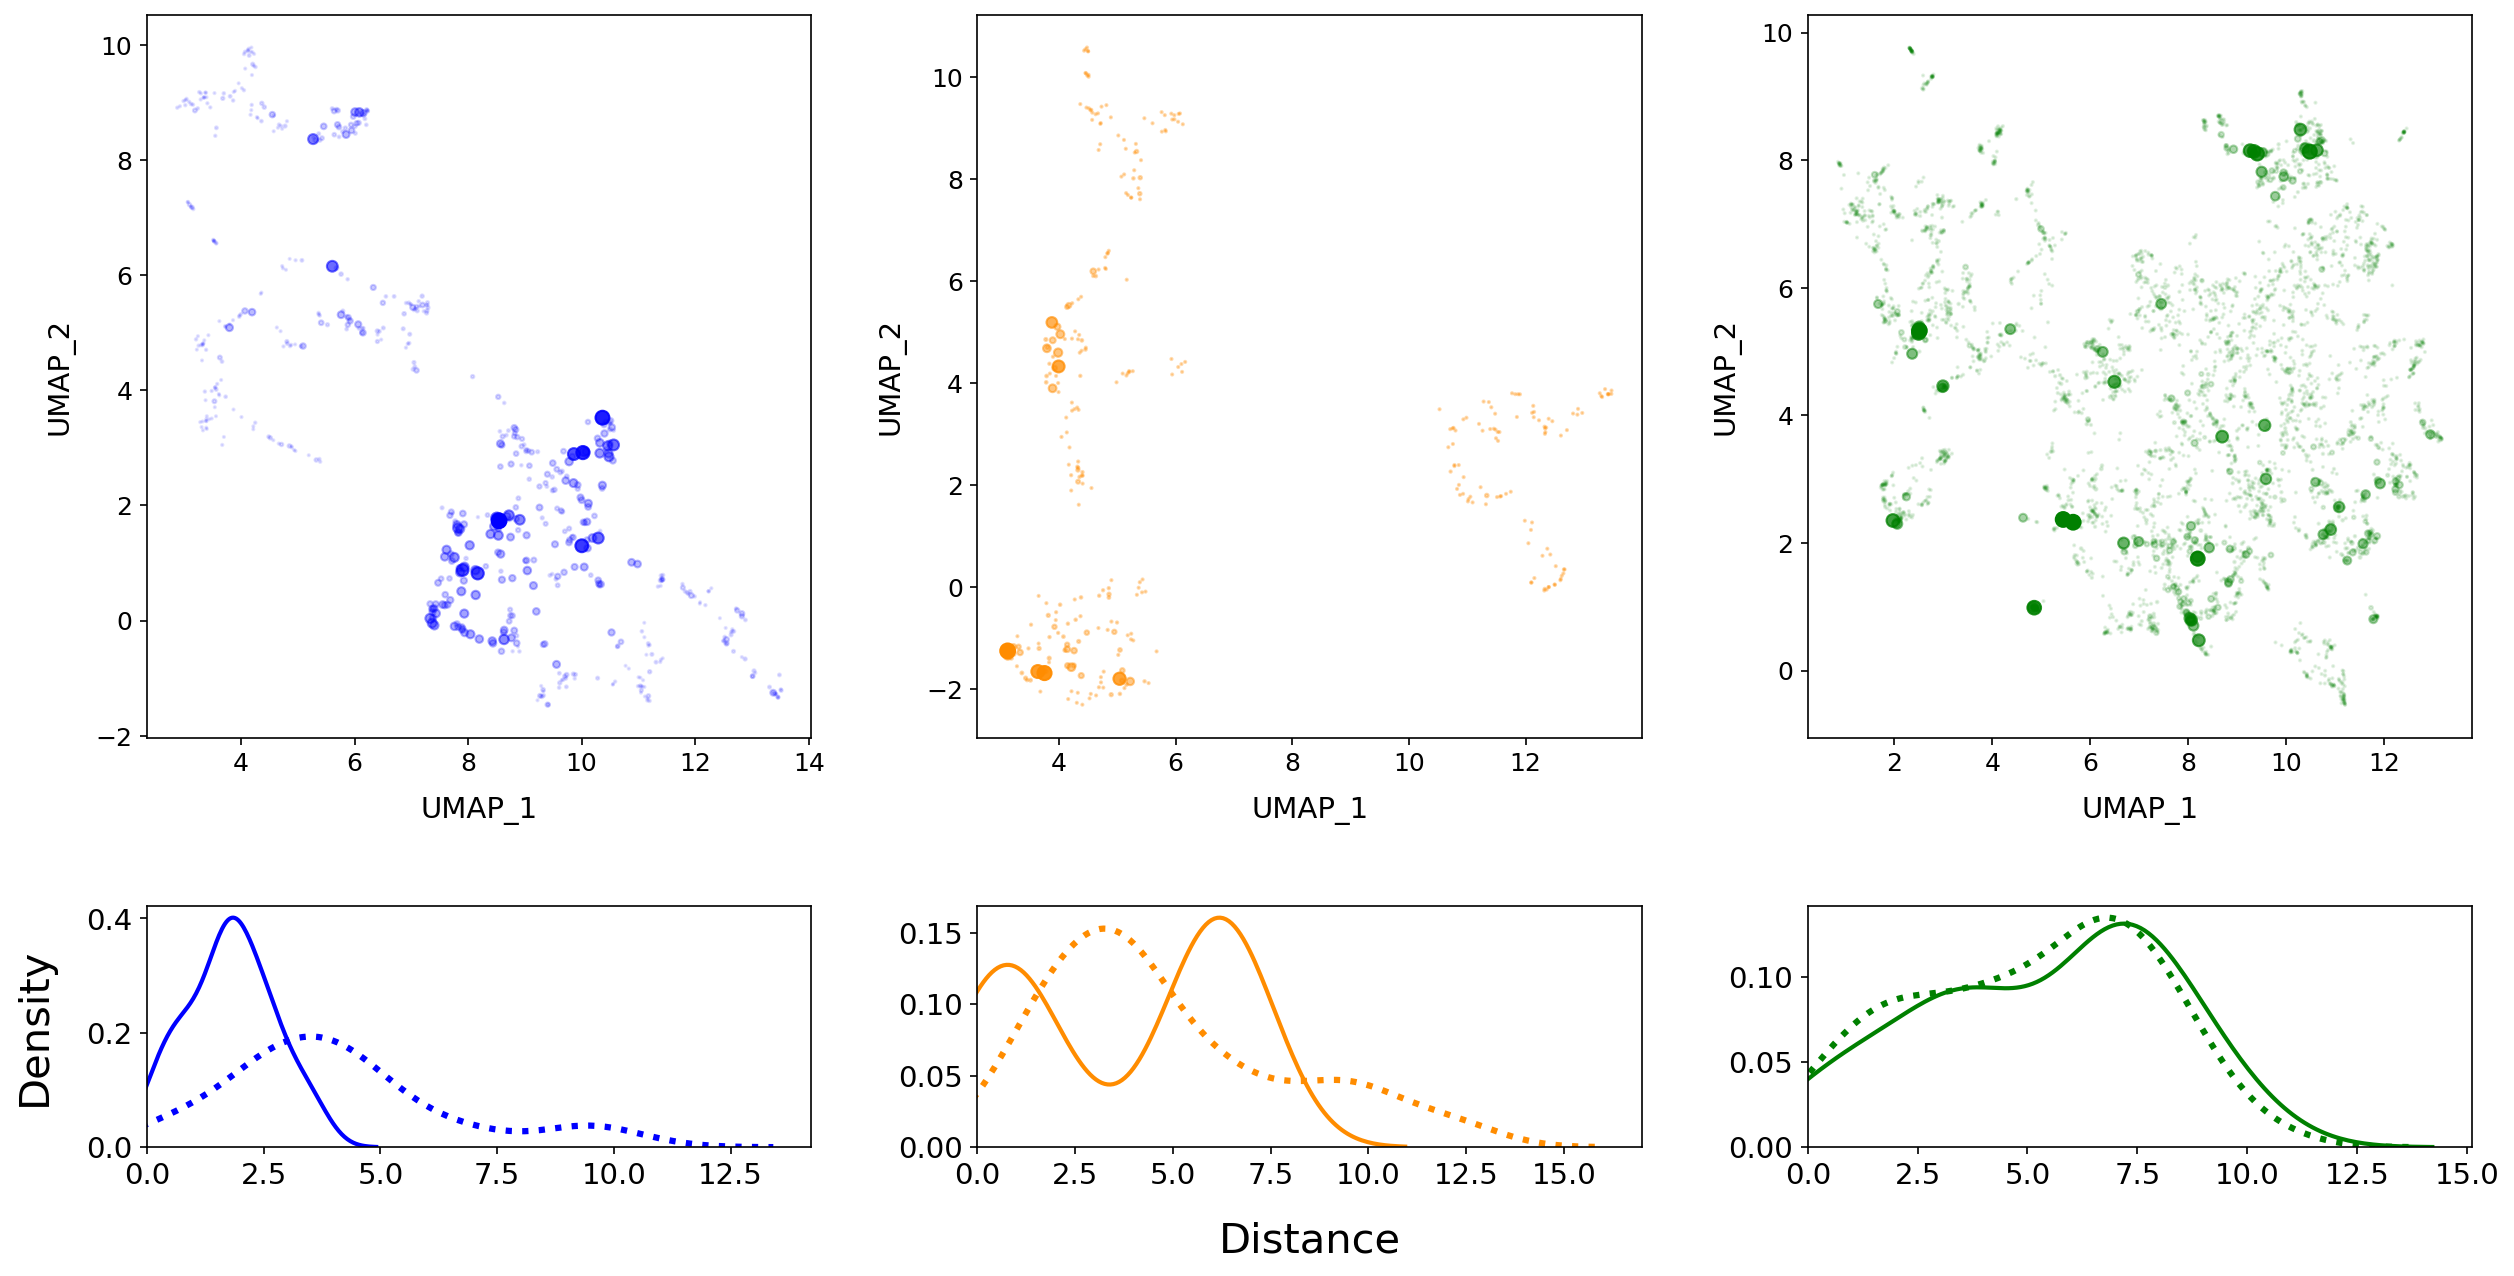

In [19]:
trans_bb1_2D = umap_transform(bb1_dist_2D)
trans_bb2_2D = umap_transform(bb2_dist_2D)
trans_bb3_2D = umap_transform(bb3_dist_2D)

fig, _, _ = plot_umap(bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1_2D, trans_bb2_2D, trans_bb3_2D)

### Cluster with HDBSCAN

In [21]:
sil_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='silhouette')
ch_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='calinski_harabasz_score')
db_params_bb1 = find_optimal_hdbscan(trans_bb1.embedding_, method='davies_bouldin_score')
obj_search_bb1 = hdbscan_param_search(bb1_pactive, trans_bb1)
obj_params_bb1 = optimal_params(obj_search_bb1)

In [22]:
sil_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='silhouette')
ch_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='calinski_harabasz_score')
db_params_bb2 = find_optimal_hdbscan(trans_bb2.embedding_, method='davies_bouldin_score')
obj_search_bb2 = hdbscan_param_search(bb2_pactive, trans_bb2)
obj_params_bb2 = optimal_params(obj_search_bb2)

In [23]:
sil_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='silhouette')
ch_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='calinski_harabasz_score')
db_params_bb3 = find_optimal_hdbscan(trans_bb3.embedding_, method='davies_bouldin_score')
obj_search_bb3 = hdbscan_param_search(bb3_pactive, trans_bb3)
obj_params_bb3 = optimal_params(obj_search_bb3)

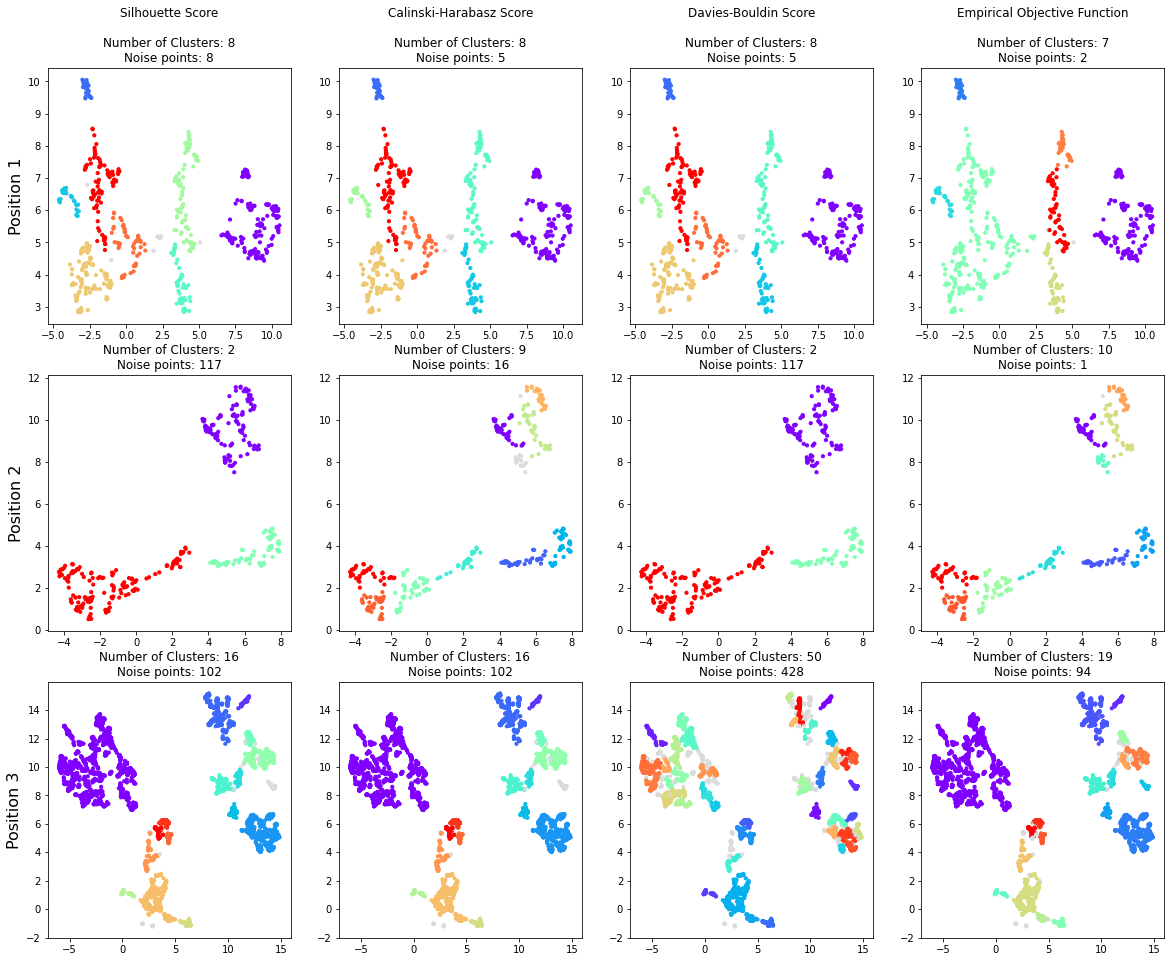

In [24]:
fig, axs = plt.subplots(3,4, figsize=(20,16))
sil_bb1 = hdbscan.HDBSCAN(min_cluster_size=sil_params_bb1[0], min_samples=sil_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
sil_bb1_colors = set_colors(sil_bb1.labels_)
axs[0][0].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=sil_bb1_colors[sil_bb1.labels_], s=10)
axs[0][0].set_title(f'Silhouette Score\n\nNumber of Clusters: {len(np.unique(sil_bb1.labels_))-1}\nNoise points: {np.unique(sil_bb1.labels_, return_counts=True)[1][0]}')
axs[0][0].set_ylabel('Position 1', fontsize=16)

sil_bb2 = hdbscan.HDBSCAN(min_cluster_size=sil_params_bb2[0], min_samples=sil_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
sil_bb2_colors = set_colors(sil_bb2.labels_)
axs[1][0].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=sil_bb2_colors[sil_bb2.labels_], s=10)
axs[1][0].set_title(f'Number of Clusters: {len(np.unique(sil_bb2.labels_))-1}\nNoise points: {np.unique(sil_bb2.labels_, return_counts=True)[1][0]}')
axs[1][0].set_ylabel('Position 2', fontsize=16)

sil_bb3 = hdbscan.HDBSCAN(min_cluster_size=sil_params_bb3[0], min_samples=sil_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
sil_bb3_colors = set_colors(sil_bb3.labels_)
axs[2][0].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=sil_bb3_colors[sil_bb3.labels_], s=10)
axs[2][0].set_title(f'Number of Clusters: {len(np.unique(sil_bb3.labels_))-1}\nNoise points: {np.unique(sil_bb3.labels_, return_counts=True)[1][0]}')
axs[2][0].set_ylabel('Position 3', fontsize=16)

ch_bb1 = hdbscan.HDBSCAN(min_cluster_size=ch_params_bb1[0], min_samples=ch_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
ch_bb1_colors = set_colors(ch_bb1.labels_)
axs[0][1].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=ch_bb1_colors[ch_bb1.labels_], s=10)
axs[0][1].set_title(f'Calinski-Harabasz Score\n\nNumber of Clusters: {len(np.unique(ch_bb1.labels_))-1}\nNoise points: {np.unique(ch_bb1.labels_, return_counts=True)[1][0]}')

ch_bb2 = hdbscan.HDBSCAN(min_cluster_size=ch_params_bb2[0], min_samples=ch_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
ch_bb2_colors = set_colors(ch_bb2.labels_)
axs[1][1].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=ch_bb2_colors[ch_bb2.labels_], s=10)
axs[1][1].set_title(f'Number of Clusters: {len(np.unique(ch_bb2.labels_))-1}\nNoise points: {np.unique(ch_bb2.labels_, return_counts=True)[1][0]}')

ch_bb3 = hdbscan.HDBSCAN(min_cluster_size=ch_params_bb3[0], min_samples=ch_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
ch_bb3_colors = set_colors(ch_bb3.labels_)
axs[2][1].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=ch_bb3_colors[ch_bb3.labels_], s=10)
axs[2][1].set_title(f'Number of Clusters: {len(np.unique(ch_bb3.labels_))-1}\nNoise points: {np.unique(ch_bb3.labels_, return_counts=True)[1][0]}')

db_bb1 = hdbscan.HDBSCAN(min_cluster_size=db_params_bb1[0], min_samples=db_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
db_bb1_colors = set_colors(db_bb1.labels_)
axs[0][2].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=db_bb1_colors[db_bb1.labels_], s=10)
axs[0][2].set_title(f'Davies-Bouldin Score\n\nNumber of Clusters: {len(np.unique(db_bb1.labels_))-1}\nNoise points: {np.unique(db_bb1.labels_, return_counts=True)[1][0]}')

db_bb2 = hdbscan.HDBSCAN(min_cluster_size=db_params_bb2[0], min_samples=db_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
db_bb2_colors = set_colors(db_bb2.labels_)
axs[1][2].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=db_bb2_colors[db_bb2.labels_], s=10)
axs[1][2].set_title(f'Number of Clusters: {len(np.unique(db_bb2.labels_))-1}\nNoise points: {np.unique(db_bb2.labels_, return_counts=True)[1][0]}')

db_bb3 = hdbscan.HDBSCAN(min_cluster_size=db_params_bb3[0], min_samples=db_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
db_bb3_colors = set_colors(db_bb3.labels_)
axs[2][2].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=db_bb3_colors[db_bb3.labels_], s=10)
axs[2][2].set_title(f'Number of Clusters: {len(np.unique(db_bb3.labels_))-1}\nNoise points: {np.unique(db_bb3.labels_, return_counts=True)[1][0]}')

obj_bb1 = hdbscan.HDBSCAN(min_cluster_size=obj_params_bb1[0], min_samples=obj_params_bb1[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb1.embedding_)
obj_bb1_colors = set_colors(obj_bb1.labels_)
axs[0][3].scatter(trans_bb1.embedding_[:, 0], trans_bb1.embedding_[:, 1], color=obj_bb1_colors[obj_bb1.labels_], s=10)
axs[0][3].set_title(f'Empirical Objective Function\n\nNumber of Clusters: {len(np.unique(obj_bb1.labels_))-1}\nNoise points: {np.unique(obj_bb1.labels_, return_counts=True)[1][0]}')

obj_bb2 = hdbscan.HDBSCAN(min_cluster_size=obj_params_bb2[0], min_samples=obj_params_bb2[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb2.embedding_)
obj_bb2_colors = set_colors(obj_bb2.labels_)
axs[1][3].scatter(trans_bb2.embedding_[:, 0], trans_bb2.embedding_[:, 1], color=obj_bb2_colors[obj_bb2.labels_], s=10)
axs[1][3].set_title(f'Number of Clusters: {len(np.unique(obj_bb2.labels_))-1}\nNoise points: {np.unique(obj_bb2.labels_, return_counts=True)[1][0]}')

obj_bb3 = hdbscan.HDBSCAN(min_cluster_size=obj_params_bb3[0], min_samples=obj_params_bb3[1], metric='euclidean', gen_min_span_tree=True, 
                      allow_single_cluster=False, prediction_data=True).fit(trans_bb3.embedding_)
obj_bb3_colors = set_colors(obj_bb3.labels_)
axs[2][3].scatter(trans_bb3.embedding_[:, 0], trans_bb3.embedding_[:, 1], color=obj_bb3_colors[obj_bb3.labels_], s=10)
axs[2][3].set_title(f'Number of Clusters: {len(np.unique(obj_bb3.labels_))-1}\nNoise points: {np.unique(obj_bb3.labels_, return_counts=True)[1][0]}')
plt.show()

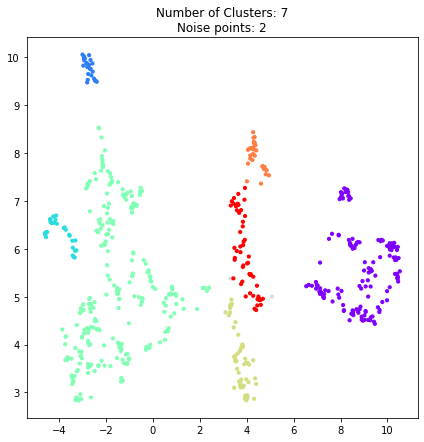

In [25]:
bb1_pactive = plot_hdbscan(bb1_pactive, obj_params_bb1, trans_bb1)

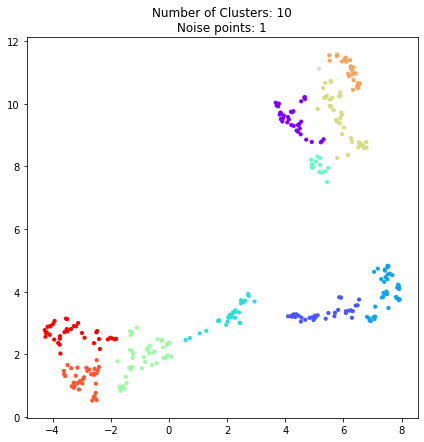

In [26]:
bb2_pactive = plot_hdbscan(bb2_pactive, obj_params_bb2, trans_bb2)

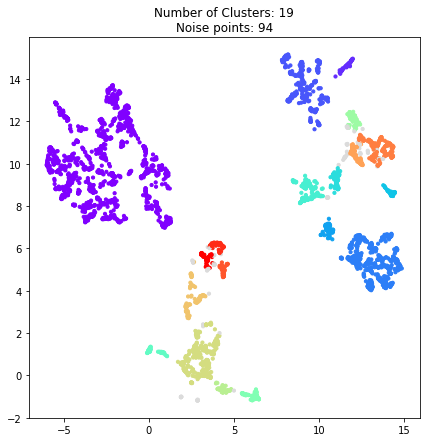

In [27]:
bb3_pactive = plot_hdbscan(bb3_pactive, obj_params_bb3, trans_bb3)

### Plot objective function

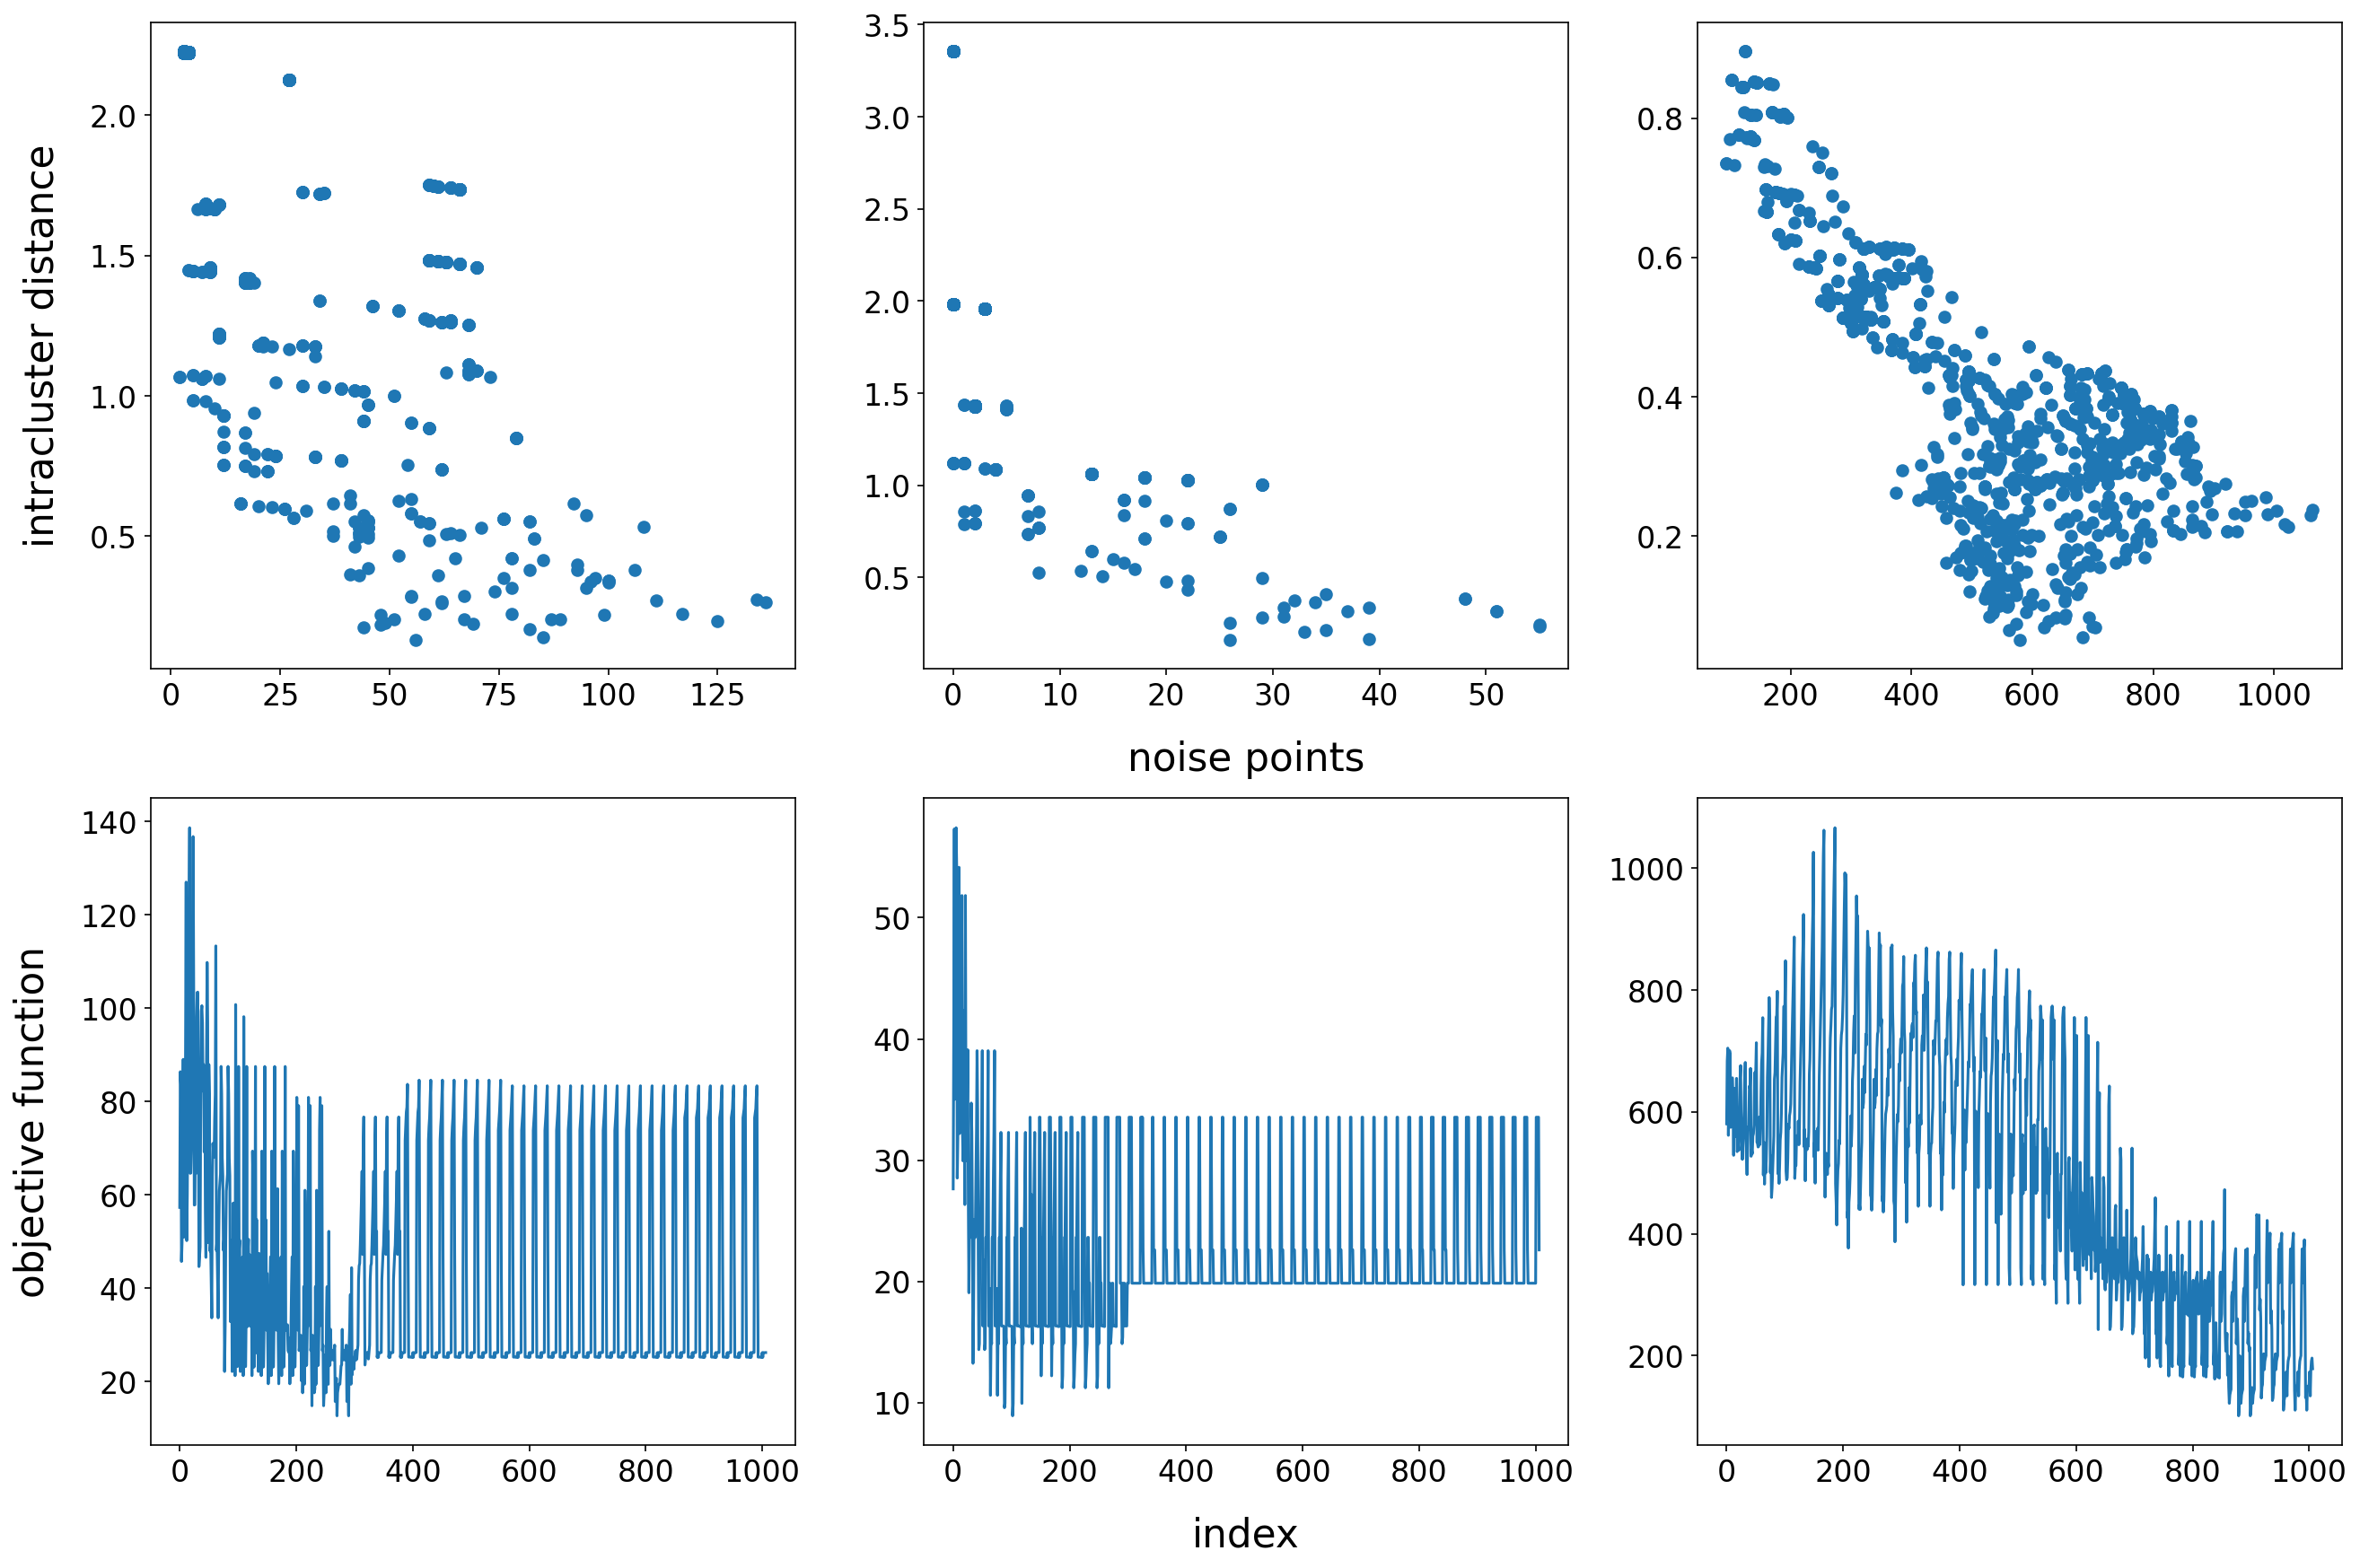

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(21,14), dpi=150)
axs[0][0].scatter(obj_search_bb1['n_noise'], obj_search_bb1['icd'])
axs[0][1].scatter(obj_search_bb2['n_noise'], obj_search_bb2['icd'])
axs[0][2].scatter(obj_search_bb3['n_noise'], obj_search_bb3['icd'])
axs[0][1].set_xlabel('noise points', fontsize=21, labelpad=15)
axs[0][0].set_ylabel('intracluster distance', fontsize=21, labelpad=15)
axs[0][0].tick_params(labelsize=16)
axs[0][1].tick_params(labelsize=16)
axs[0][2].tick_params(labelsize=16)

axs[1][0].plot(obj(obj_search_bb1))
axs[1][1].plot(obj(obj_search_bb2))
axs[1][2].plot(obj(obj_search_bb3))
axs[1][1].set_xlabel('index', fontsize=21, labelpad=15)
axs[1][0].set_ylabel('objective function', fontsize=21, labelpad=15)
axs[1][0].tick_params(labelsize=16)
axs[1][1].tick_params(labelsize=16)
axs[1][2].tick_params(labelsize=16)
#fig.savefig('../SI/figures/images/obj_func.png')
plt.show()

#### View interactive plots with compound structures (mouse-over point)

In [29]:
#plot_hdbscan_interactive(bb1_pactive, bb1_best_params, trans_bb1, bb_pos='bb1')
#plot_hdbscan_interactive(bb2_pactive, bb2_best_params, trans_bb2, bb_pos='bb2')
#plot_hdbscan_interactive(bb3_pactive, bb3_best_params, trans_bb3, bb_pos='bb3')

### Aggregate by cluster

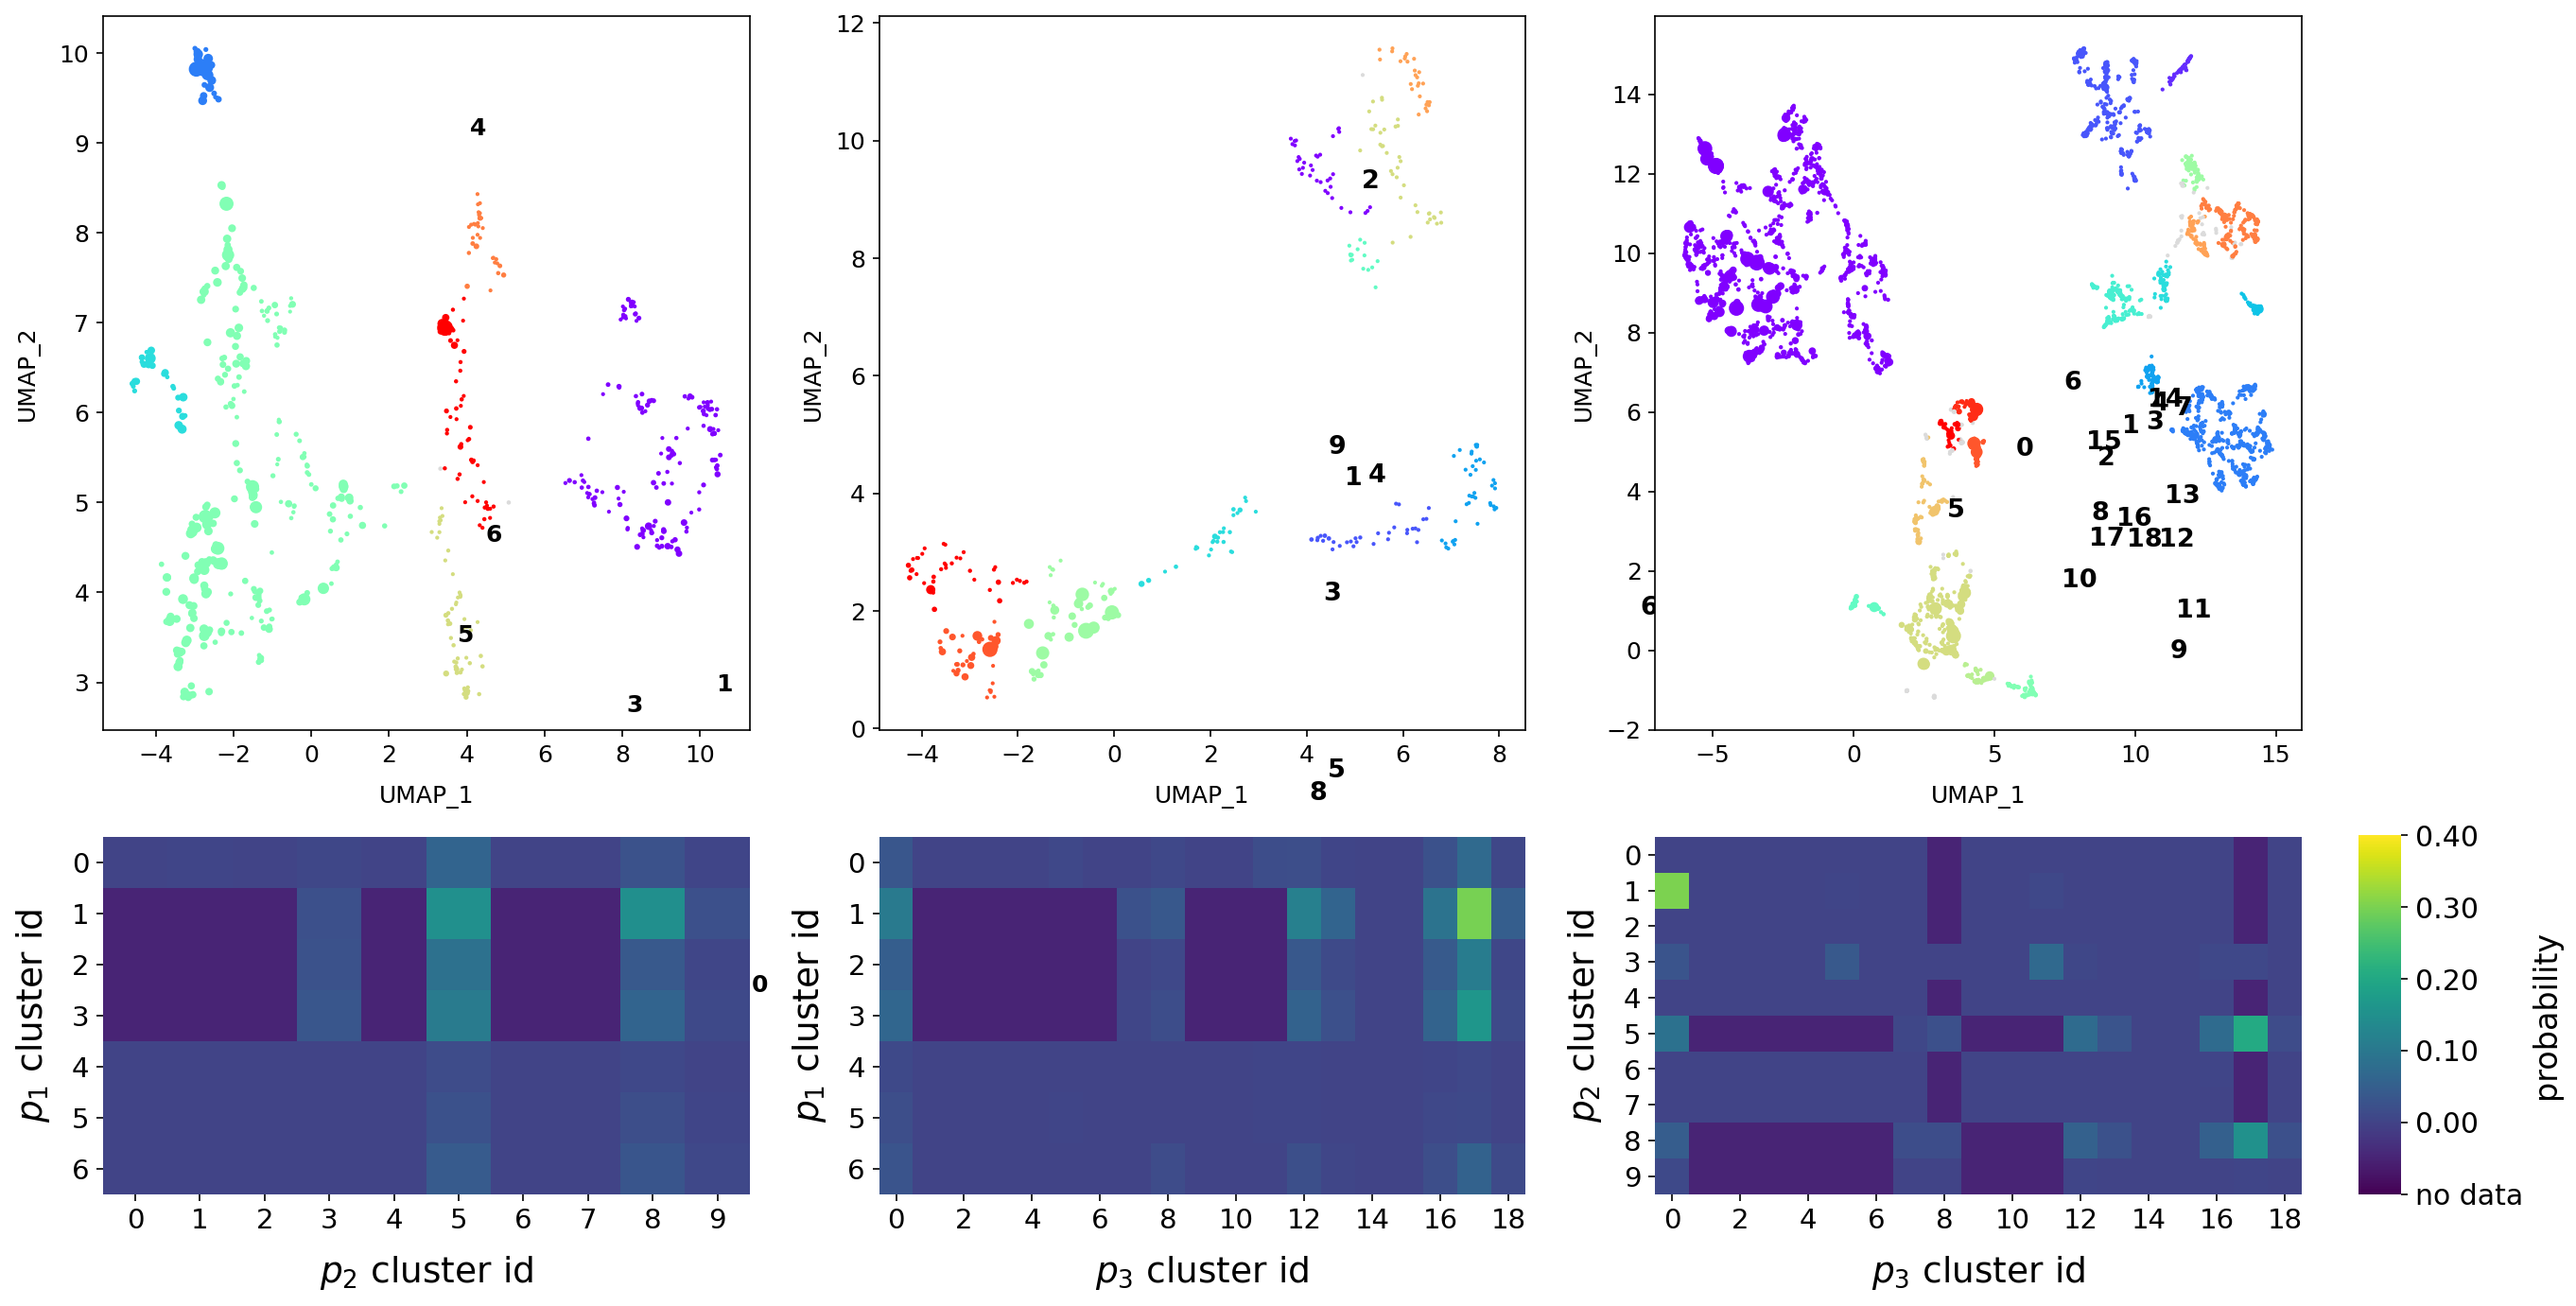

In [30]:
p_12, p_13, p_23 = plot_cluster_combos(total_compounds, bb1_pactive, bb2_pactive, bb3_pactive, trans_bb1, trans_bb2, trans_bb3)

In [31]:
# array_to_latex.to_ltx(p_12, frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_13[:, :12], frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_13[:, 12:], frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_23[:, :12], frmt='{:.4f}', arraytype='tabular')
# array_to_latex.to_ltx(p_23[:, 12:], frmt='{:.4f}', arraytype='tabular')

### Distribution of P(active) values and building blocks in each cluster

In [32]:
bb1_cluster, bb1_data = cluster_rep(bb1_pactive, bb_pos='bb1')
bb2_cluster, bb2_data = cluster_rep(bb2_pactive, bb_pos='bb2')
bb3_cluster, bb3_data = cluster_rep(bb3_pactive, bb_pos='bb3')

In [34]:
bb1_random = gen_random_cluster(bb1_pactive)
bb2_random = gen_random_cluster(bb2_pactive)
bb3_random = gen_random_cluster(bb3_pactive)

In [47]:
## Calculate FWHM for bbs with P(active) > 0
bb1_active = bb1_pactive.loc[bb1_pactive['P(active)'] > 0].reset_index()
bb1_fwhm = pd.DataFrame(calc_fwhm(bb1_active).items(), columns=['Cluster', 'FWHM']).assign(random=False)

bb2_active = bb2_pactive.loc[bb2_pactive['P(active)'] > 0].reset_index()
bb2_fwhm = pd.DataFrame(calc_fwhm(bb2_active).items(), columns=['Cluster', 'FWHM']).assign(random=False)

bb3_active = bb3_pactive.loc[bb3_pactive['P(active)'] > 0].reset_index()
bb3_fwhm = pd.DataFrame(calc_fwhm(bb3_active).items(), columns=['Cluster', 'FWHM']).assign(random=False)

In [52]:
bb1_t, bb1_rand_fwhm = fwhm_ttest(bb1_active, bb1_fwhm, N=50)
print(bb1_t)
bb2_t, bb2_rand_fwhm = fwhm_ttest(bb2_active, bb2_fwhm, N=50)
print(bb2_t)
bb3_t, bb3_rand_fwhm = fwhm_ttest(bb3_active, bb3_fwhm, N=50)
print(bb3_t)

Ttest_indResult(statistic=-0.3344056434863809, pvalue=0.7438456140948899)
Ttest_indResult(statistic=-2.2000973451398, pvalue=0.042838312710217805)
Ttest_indResult(statistic=-3.527607751537741, pvalue=0.0012242208122128634)


In [53]:
bb1_FWHM = pd.concat([bb1_fwhm, bb1_rand_fwhm])
bb2_FWHM = pd.concat([bb2_fwhm, bb2_rand_fwhm])
bb3_FWHM = pd.concat([bb3_fwhm, bb3_rand_fwhm])

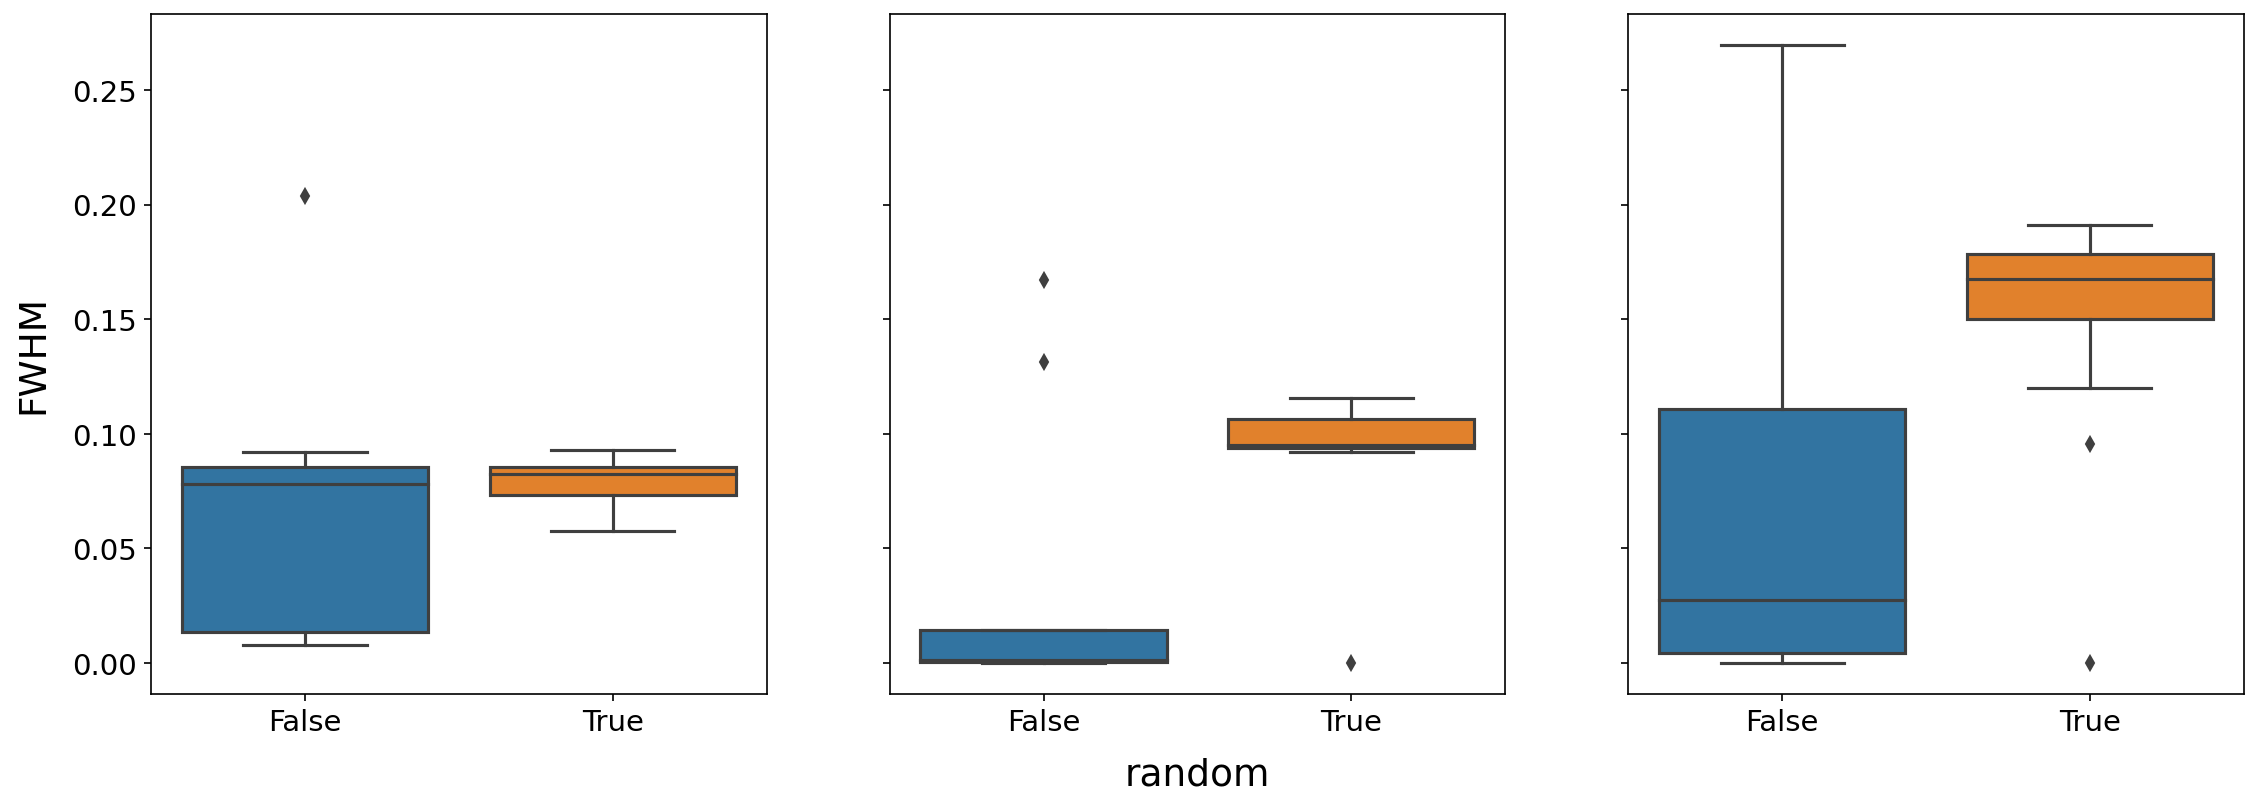

In [54]:
fig, axs = plt.subplots(1, 3, dpi=150, figsize=(18,6), sharey=True)
lfs = 18
tfs = 14
sns.boxplot(x='random', y='FWHM', data=bb1_FWHM, ax=axs[0])
sns.boxplot(x='random', y='FWHM', data=bb2_FWHM, ax=axs[1])
sns.boxplot(x='random', y='FWHM', data=bb3_FWHM, ax=axs[2])
axs[0].set_xlabel("")
axs[0].tick_params(labelsize=tfs)
axs[0].set_ylabel("FWHM", labelpad=10, fontsize=lfs)
axs[1].tick_params(labelsize=tfs)
axs[1].set_xlabel("random", labelpad=10, fontsize=lfs)
axs[1].set_ylabel("")
axs[2].tick_params(labelsize=tfs)
axs[2].set_xlabel("")
axs[2].set_ylabel("")
plt.show()
#fig.savefig('figures/images/FWHM_boxplot.png')

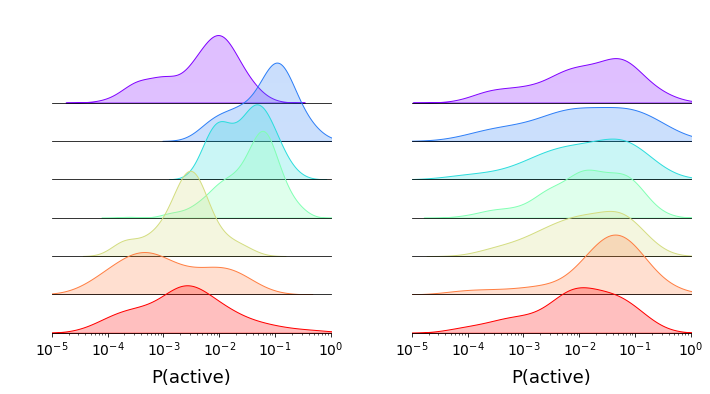

In [55]:
plot_cluster_pactive(bb1_pactive, bb1_random)

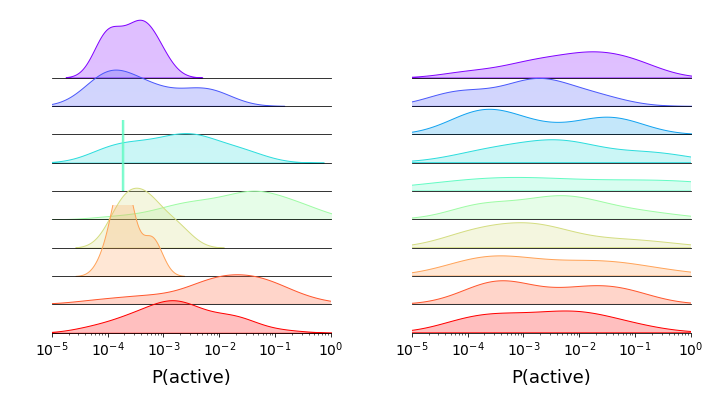

In [56]:
plot_cluster_pactive(bb2_pactive, bb2_random)

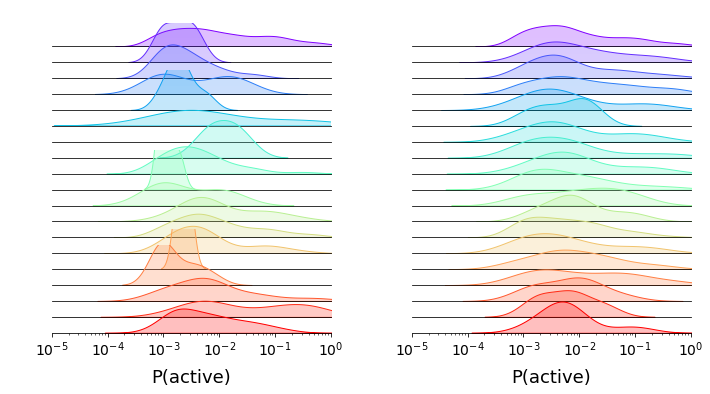

In [57]:
plot_cluster_pactive(bb3_pactive, bb3_random)

In [58]:
auc_75_3D = pd.read_csv('auc_75_3D.csv').assign(frac=0.75)
auc_90_3D = pd.read_csv('auc_90_3D.csv').assign(frac=0.90)
auc_95_3D = pd.read_csv('auc_95_3D.csv').assign(frac=0.95)

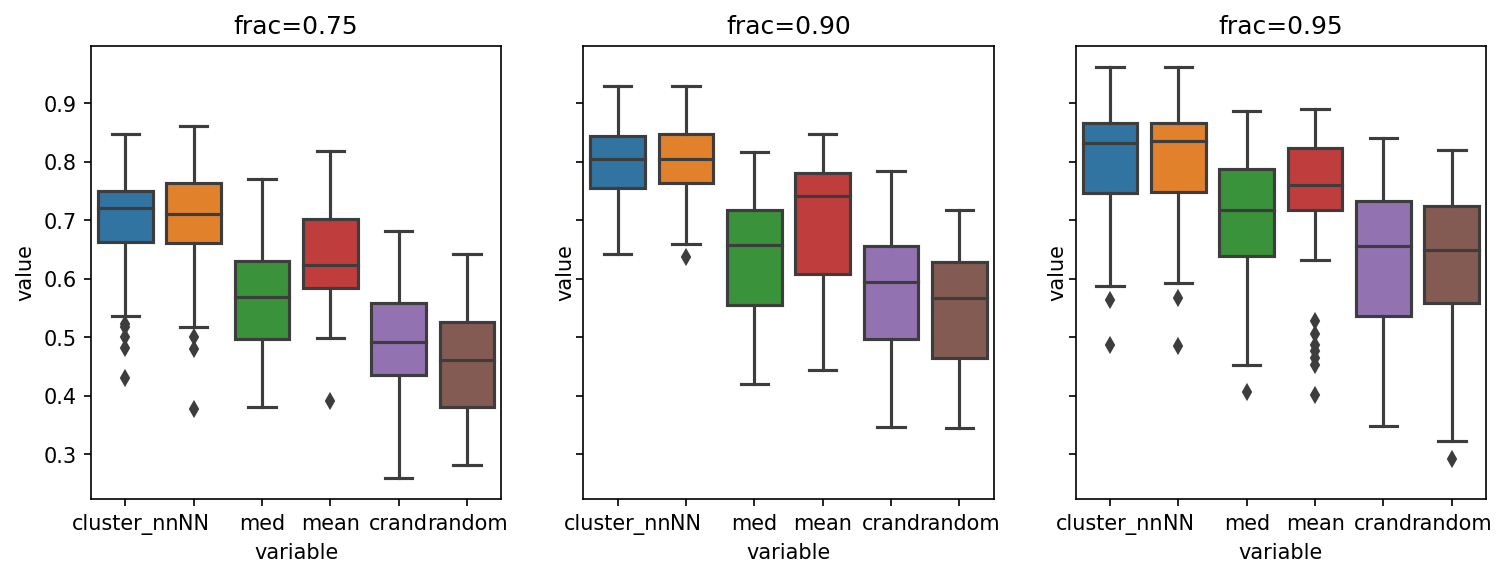

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(12,4), dpi=150, sharey=True)
sns.boxplot(x='variable', y='value', data=pd.melt(auc_75_3D, id_vars='frac'), ax=axs[0])
sns.boxplot(x='variable', y='value', data=pd.melt(auc_90_3D, id_vars='frac'), ax=axs[1])
sns.boxplot(x='variable', y='value', data=pd.melt(auc_95_3D, id_vars='frac'), ax=axs[2])
axs[0].set_title('frac=0.75')
axs[1].set_title('frac=0.90')
axs[2].set_title('frac=0.95')
plt.show()

In [60]:
concat_auc = pd.concat([auc_75_3D, auc_90_3D, auc_95_3D])
total_auc = pd.melt(concat_auc, id_vars='frac')

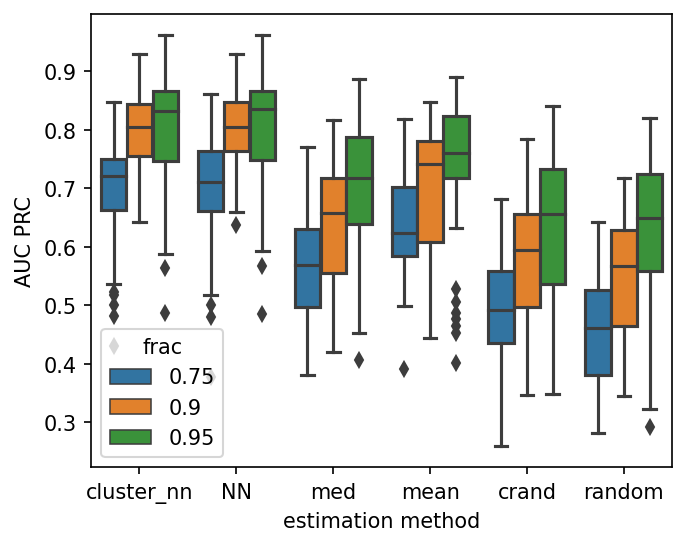

In [61]:
fig, axs = plt.subplots(figsize=(5,4), dpi=150)
sns.boxplot(x='variable', y='value', hue='frac', data=total_auc, ax=axs)
axs.set_xlabel('estimation method')
axs.set_ylabel('AUC PRC')
plt.show()